# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [3]:
# Import relevant Python libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [4]:
# Import data
data = pd.read_csv("marketing_sales_data.csv")

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [5]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Question:** What do you observe about the different variables included in the data?

* Each row represents a promotion, with allocation of advertising budget and accrued sales. 
* There appear to be two types of data: coninous and categorical. 

* Categorical variables are TV promotion budget (TV) with values of Low, Medium or High, and type of infulencer the social media promotion is with (Influencer), with values of Nano, Micro, Macro and Mega. 

* Continuous variables are the radio budget (Radio), the  social media budget ('Social Media) and the Sales accrued from the promotion. 



Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [6]:
# Display number of rows, number of columns.
data.shape

(572, 5)

**Question:** How many rows and columns exist in the data?

[Write your response here. Double-click (or enter) to edit.]

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [7]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
data.isna()


,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [8]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [9]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()


3

**Question:** How many rows containing missing values?

There are only 3 rows containing missing values, out of 572 rows. As the number of rows with missing values is quite small, these can be removed from the analysis. 

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [11]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.

data = data.dropna(axis=0)


In [13]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()


0

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

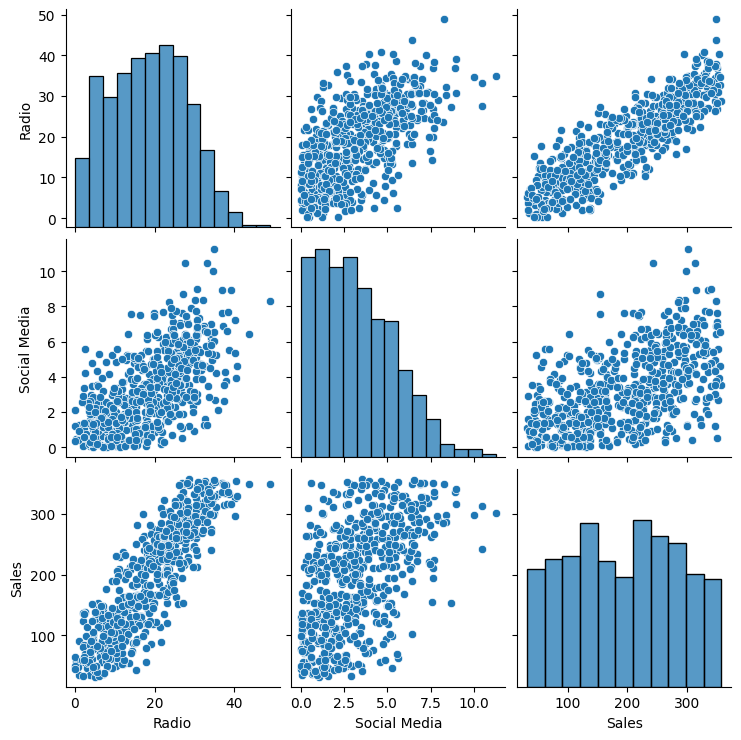

In [14]:
# Create plot of pairwise relationships.

sns.pairplot(data)


**Question:** Is the assumption of linearity met?

* The assumption of linearity is met for sales vs radio budget. There may be some correlation between social media budget and sales, but the social media budget distribution has a right skew. 

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [21]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.
ols_data = data[['Radio', 'Sales']]

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [23]:
# Display first 10 rows of the new DataFrame.
ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [31]:
# Write the linear regression formula.
# Save it in a variable.
ols_formula = 'Sales ~ Radio'


Now, implement the ordinary least squares (OLS) approach for linear regression.

In [32]:
# Implement OLS.
OLS = ols(formula=ols_formula, data=ols_data)

Now, create a linear regression model for the data and fit the model to the data.

In [34]:
# Fit the model to the data.
# Save the fitted model in a variable.
model = OLS.fit()

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [35]:
# Get summary of results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          2.07e-176
Time:                        16:50:16   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

* b = 41.53

**Question:** What is the slope? 

* m = 8.17

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


* y = 8.17 * x + 41.53

**Question:** What does the slope mean in this context?

* For every 1 million in radio budget (x), the sales accrued amount to ~8.17 million. This means that sales equal roughly 8.17 times the value of the budget allocated to radio adverstising. 

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

<Axes: xlabel='Radio', ylabel='Sales'>

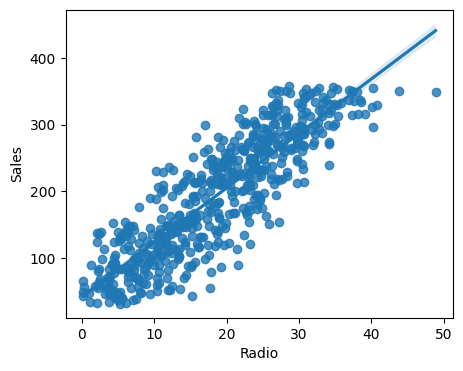

In [40]:
# Plot the OLS data with the best fit regression line.
plt.figure(figsize=(5,4))
sns.regplot(data=ols_data, x='Radio', y='Sales')


**Question:** What do you observe from the preceding regression plot?

* The plot above shows the data along with a best fit line. The plot shows the assumption of linearity is correct. 

Now, check the normality assumption. Get the residuals from the model.

In [44]:
# Get the residuals from the model.
residuals = model.resid

Now, visualize the distribution of the residuals.

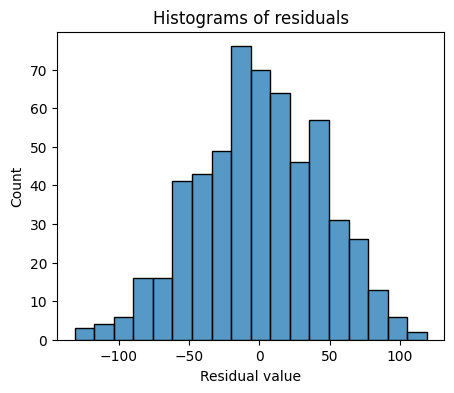

In [48]:
# Visualize the distribution of the residuals.
plt.figure(figsize=(5,4))
sns.histplot(model.resid)
plt.xlabel("Residual value")
plt.ylabel("Count")
plt.title("Histograms of residuals")
plt.show()


**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

* The residuals appear to be normally distributed. This will be checked further with a Q-Q plot. 

Next, create a Q-Q plot to confirm the assumption of normality.

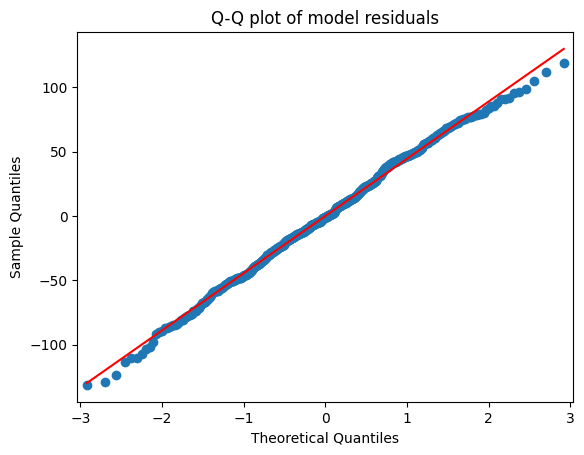

In [56]:
# Create a Q-Q plot.
sm.qqplot(model.resid, line='s')
plt.title("Q-Q plot of model residuals")
plt.show()

**Question:** Is the assumption of normality met?

* The assumption of normality is met. Residual quantiles correspond to the theoretical quantiles.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [59]:
# Get fitted values.
fitted_vals = model.predict(ols_data['Radio'])


Next, create a scatterplot of the residuals against the fitted values.

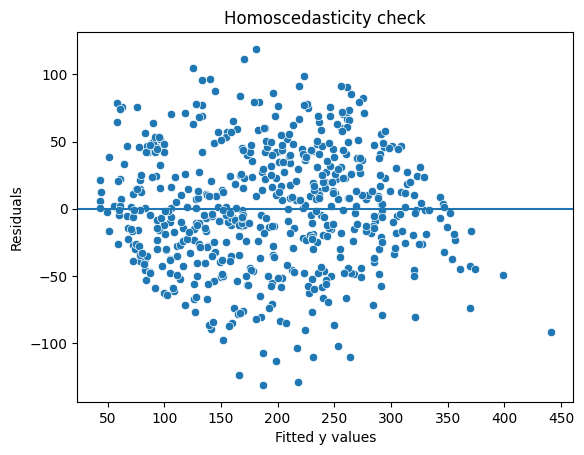

In [64]:
# Create a scatterplot of residuals against fitted values.

sns.scatterplot(x=fitted_vals, y=model.resid)
plt.xlabel('Fitted y values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity check')
plt.axhline(0)
plt.show()

**Question:** Are the assumptions of independent observation and homoscedasticity met?


* Based on the data, we can assume that all observations are independent. 
* Based on the plot above, there doesn't seem to be any relationship between residuals and fitted values, suggesting homoscedasticity or constant variance is met. 

## **Considerations**

**What are some key takeaways that you learned during this lab?**

* The ols object from statsmodels.formula.api allows the construction of a simple linear model to fit the data
* The initial assumption of linearity can be checked using sns.pairplot() plot grid for the data. 
* Once the model is constructed, the linearity can be confirmed by creating a sns.regplot(). 
* Normal distribution of residuals can be confirmed by calculating model.resid and generating a qqplot using the statsmodels.api - sm.qqplot() to determine if the residual quantiles correspond to the theoretical quantiles. 
* Homoscedasticity can be checked by plotting residuals (model.resid) vs model.predict(x) - if the errors appear to be randomly distributed across the predicted y spectrum, homoscedasticity is met. 

**How would you present your findings from this lab to others?**


* The Ordinary Least Square simple linear regression model indicates there is a good linear relationship between the budget allocated to radio advertising and total sales. 

* The data fits the following model:
Sales = 8.17 * (radio_budget) + 41.53 

* Both coefficients are statistically significant (p=0), indicating that there is an extremely low probablity these data would be obtained if the null hypothesis (no relationship) were true. 

* The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty. The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 

**What summary would you provide to stakeholders?**

Based on the simple linear regression performed here there is a significant linear relationship between radio promotion and sales. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)